In [2]:
import numpy as np
import matplotlib.pyplot as plt

**Question** Charger l'image de mon chat dans `DSC07837.JPG` avec `imread` et l'afficher avec `imshow`. Quelles sont les dimensions du tenseur lu avec `imread` ?

In [20]:
image = plt.imread('./DSC07837.JPG')

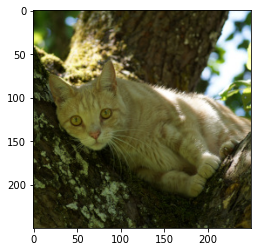

In [51]:
plt.imshow(image)

In [21]:
image.shape

(250, 250, 3)

**Question** Une telle image a 3 canaux. Afficher juste le dernier canal avec `imshow`

In [213]:
i0 = image[:,:,0]

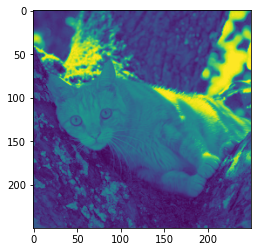

In [214]:
plt.imshow(i0)

**Question** On va transformer l'image en déplaçant les pixels avec une transformation linéaire. Faites la matrice de toutes les coordonnées possibles. C'est une matrice de (2, 250x250). La première ligne contient toutes les valeurs de `x` possibles et la deuxième toutes les `y`...

    array([[  0,   1,   2, ..., 247, 248, 249],
           [  0,   0,   0, ..., 249, 249, 249]])
           
Aide: Avec `meshgrid` et `ravel`, ça se fait.

In [218]:
x, y = np.meshgrid(np.arange(250), np.arange(250))
coords=np.array((x.ravel(), y.ravel()))
coords

array([[  0,   1,   2, ..., 247, 248, 249],
       [  0,   0,   0, ..., 249, 249, 249]])

In [216]:
coords.shape

(2, 62500)

**Question** Créer une matrice de transformation `[[2, 0], [1, 4]]` et l'appliquer à ces coordonnées. 

In [171]:
A = np.array([[2, 0], [1, 4]])

In [172]:
X = A @ coords

**Question** La transformation a fait sortir de l'espace `[0,250[`. Renormalisez de façon à retrouver des coordonnées dans cet intervalle. NB: votre résultat doit être des entiers. 

In [174]:
np.max(X,axis=1)

array([ 498, 1245])

In [175]:
newcoords = np.floor(249*X/np.max(X, axis=1)[:,np.newaxis]).astype(int)
newcoords

array([[  0,   1,   2, ..., 247, 248, 249],
       [  0,   0,   0, ..., 248, 248, 249]])

**Question** Avec ces nouvelles coordonnées vous pouvez créer une nouvelle matrice pour le premier canal et l'afficher.

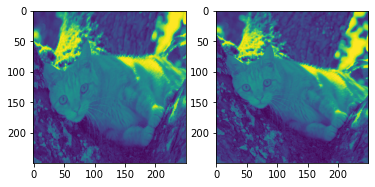

In [178]:
i0_trans = i0[newcoords[1], newcoords[0]]

In [179]:
i0_trans = i0_trans.reshape(250,-1)

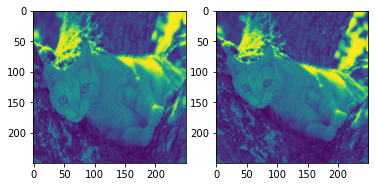

In [212]:
fig, (a1, a2) = plt.subplots(1, 2)
a1.imshow(i0_trans)
a2.imshow(i0)


**Question** Vous pouvez même faire cela sur les 3 canaux d'un seul coup en fait...

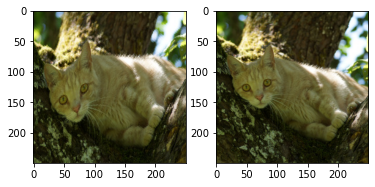

In [186]:
i_trans = image[newcoords[1], newcoords[0],:]

In [189]:
i_trans = i_trans.reshape(250,250,3)

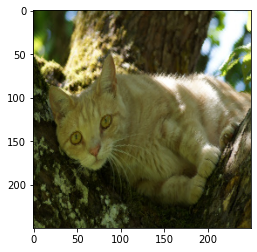

In [215]:
plt.imshow(i_trans)

In [191]:
def transform(A):
    X = A @ coords
    newcoords = np.floor(249*X/np.max(X, axis=1)[:,np.newaxis]).astype(int)
    i_trans = image[newcoords[1], newcoords[0],:].reshape(250, 250, 3)
    return i_trans

In [192]:
def affiche(im):
    fig, (a1, a2) = plt.subplots(1, 2)
    a1.imshow(im)
    a2.imshow(image)

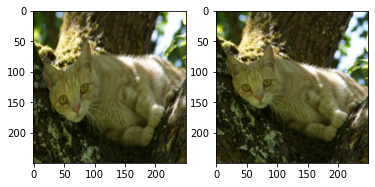

In [193]:
affiche(transform(A))

**Question** En s'amusant avec ipywidgets on peut paramétrer la transformation en jouant sur les valeurs extradiagonales (par exemple)...

In [208]:
def aff_ab(a, b):
    affiche(transform(np.array([[1,a], [b, 1]])))

In [211]:
from ipywidgets import interact

interact(aff_ab , a=(0,10), b=(0,10))

interactive(children=(IntSlider(value=5, description='a', max=10), IntSlider(value=5, description='b', max=10)…

<function __main__.aff_ab(a, b)>